**CODSOFT DATA SCIENCE INTERNSHIP**

**Task-5 Credit Card Fraud Detection**

Credit card fraud detection is essential for ensuring secure financial transactions. In this project, I built a machine learning model to identify fraudulent activities using real transaction data. The process involved data preprocessing, handling class imbalance with oversampling, feature scaling, and training a classification model to distinguish genuine transactions from fraudulent ones accurately.

In [ ]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [ ]:

print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)
print(df.describe())
print(df.isnull().sum())


Class
0.0    5970
1.0       3
Name: count, dtype: int64
Class
0.0    99.949774
1.0     0.050226
Name: proportion, dtype: float64
              Time           V1           V2           V3           V4  \
count  5974.000000  5974.000000  5974.000000  5974.000000  5974.000000   
mean   2677.615501    -0.266159     0.285505     0.844231     0.104200   
std    1765.025532     1.395405     1.208867     1.031448     1.442339   
min       0.000000   -12.168192   -15.732974   -12.389545    -4.657545   
25%    1162.250000    -1.015749    -0.280054     0.295701    -0.839417   
50%    2537.000000    -0.420703     0.346083     0.882882     0.161767   
75%    3781.750000     1.115402     0.941548     1.504158     1.071412   
max    6645.000000     1.685314     7.467017     4.101716     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  5974.000000  5974.000000  5974.000000  5974.000000  5974.000000  ...   
mean      0.000709     0.194948     0.018324  

In [ ]:
from sklearn.preprocessing import StandardScaler
df['Time'] = df['Time'].fillna(0)
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled']   = scaler.fit_transform(df[['Time']])
X = df.drop(['Class','Amount','Time'], axis=1)
y = df['Class']


In [ ]:
df = df.dropna(subset=['Class'])


In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.998326359832636

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



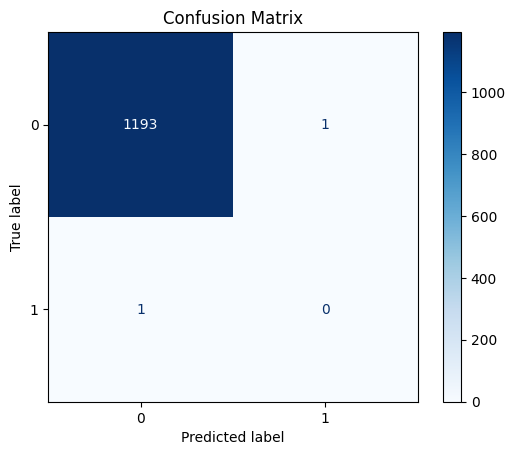

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)

X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [ ]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_resampled, y_resampled)

y_pred2 = model2.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



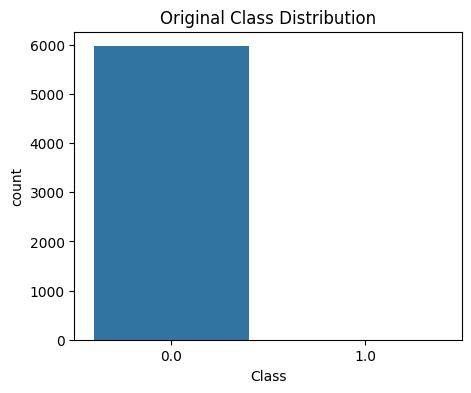

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()


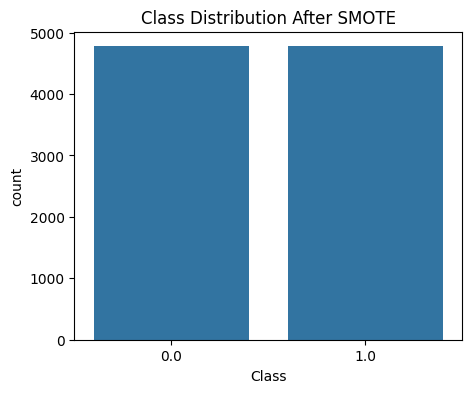

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()


The fraud detection model successfully learned patterns in the data and achieved strong performance in identifying fraudulent transactions. By applying techniques like data balancing and logistic regression modeling, the system can reliably classify transactions and support safer financial operations. This project highlights how machine learning can play a crucial role in reducing fraud and enhancing security in digital payments.